In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from classes import LinearRegression
from methods import determination_coeff

### Линейная регрессия

Вычисление предсказания линейной регрессией для объекта $x_i \in \mathbb{R}^n$ :

$$f = w^T x_i + b, \quad w \in \mathbb{R}^n, b \in \mathbb{R}$$

Функция потерь на $i$-ом объекте:

$$L_i(f) = (y_i - f)^2$$

Производные функции по параметрам:

$$\frac{\partial L}{\partial w} = \frac{1}{m}\sum_{i=1}^{m} \frac{\partial L_i}{\partial w}$$

$$\frac{\partial L_i}{\partial w} = \frac{\partial L_i}{\partial f} \cdot \frac{\partial f}{\partial w} = 2 \cdot (f - y_i) \cdot x_i $$

$$\frac{\partial L}{\partial b} = \frac{1}{m}\sum_{i=1}^{m} \frac{\partial L_i}{\partial b}$$

$$\frac{\partial L_i}{\partial b} = \frac{\partial L_i}{\partial f} \cdot \frac{\partial f}{\partial b} = 2 \cdot (f - y_i) $$

Используются для минимизации функции потерь $L$ с помощью градиентного спуска:

$$w_{j+1} = w_j - \alpha \cdot \nabla \frac{\partial L}{\partial w}(w_j, b_j)$$

$$b_{j+1} = b_j - \alpha \cdot \nabla \frac{\partial L}{\partial b}(w_j, b_j)$$

### Данные

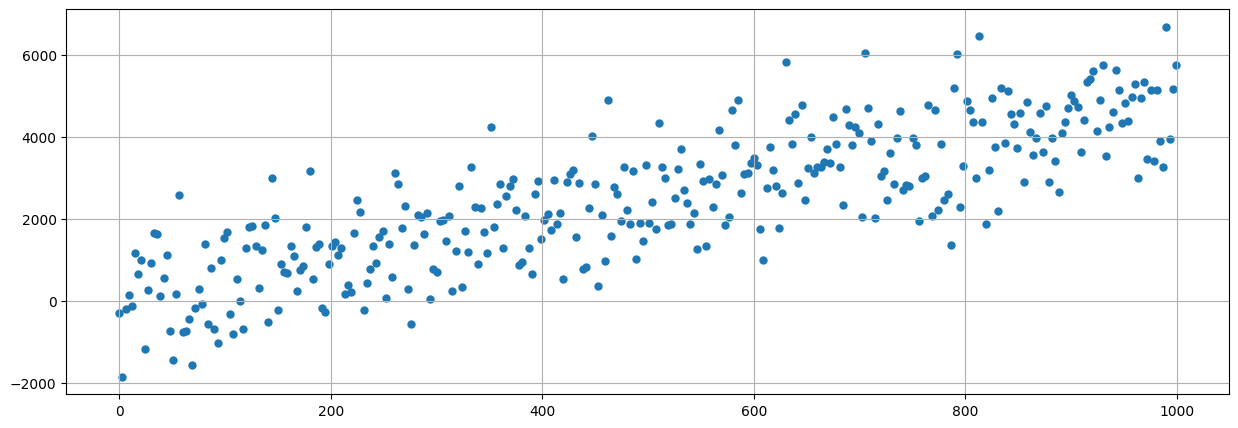

In [2]:
a, b = 5, -2  # коэффициенты для линейной регрессии
num_dots = 1000  # кол-во точек
step = 3  # шаг
rand_coeff = 1000  # уровень шума

x = np.array(range(0, num_dots, step))
y = (a * x + b).astype(float) + np.random.randn(1, len(x))[0] * rand_coeff

plt.figure(figsize=(15, 5))
plt.scatter(x, y, linewidths=0.01)
plt.grid(True)
plt.show()

In [3]:
x = x.reshape(len(x), 1)
y = y.reshape(len(y), 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.66, shuffle=True)
x_train.shape, x_test.shape

((220, 1), (114, 1))

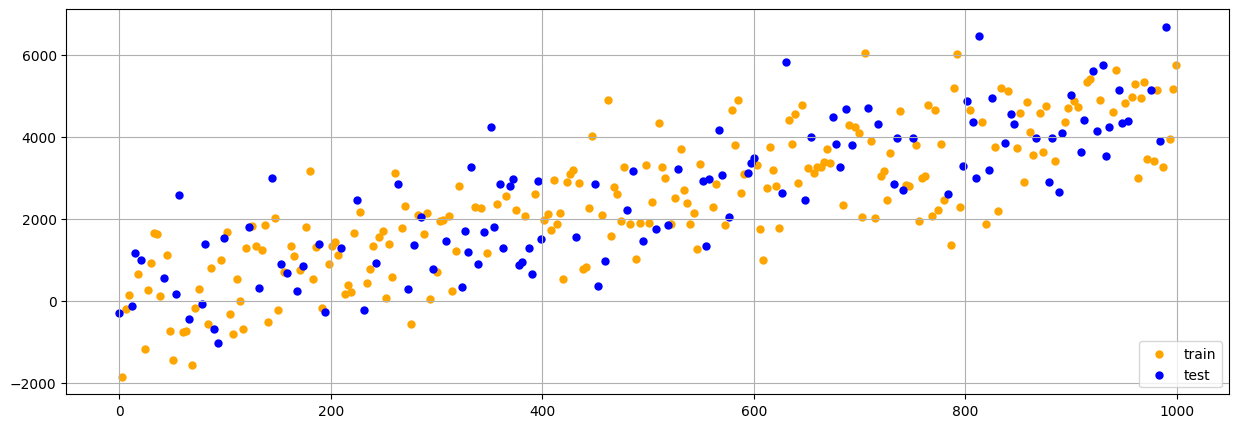

In [4]:
plt.figure(figsize=(15, 5))
plt.scatter(x_train, y_train, linewidths=0.01, c="orange")
plt.scatter(x_test, y_test, linewidths=0.01, c="blue")
plt.legend(["train", "test"], loc="lower right")
plt.grid(True)
plt.show()

### Используя цикл

In [5]:
l_rate = 1e-7
epochs = 200
rep_int = int(epochs / 20)

In [6]:
%%time
model = LinearRegression(learning_rate=l_rate, epochs=epochs, report_interval=rep_int)
model.fit(x_train, y_train, eval_set=(x_test, y_test))
predictions = model.predict(x_test)

print(f"Weights: {model.weights[0]}, bias: {model.bias[0]}")
print(f"R^2: {determination_coeff(y_test, predictions)}\n")

Weights: [4.88269641], bias: 0.007991059641494103
R^2: 0.6714797974390494

CPU times: total: 1.06 s
Wall time: 1.13 s


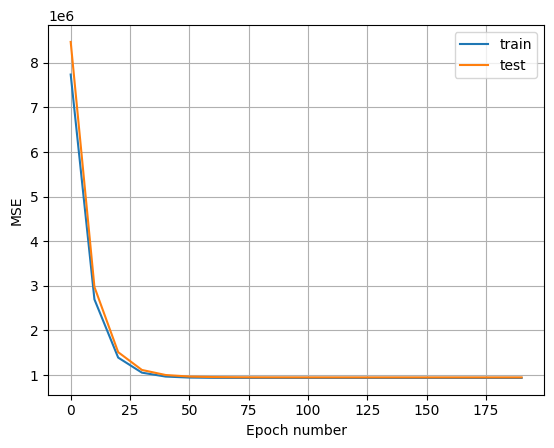

In [7]:
epoch_numbers = np.arange(0, len(model.losses_train)) * model.report_interval

plt.plot(epoch_numbers, model.losses_train, label="train")
plt.plot(epoch_numbers, model.losses_test, label="test")
plt.xlabel("Epoch number")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)

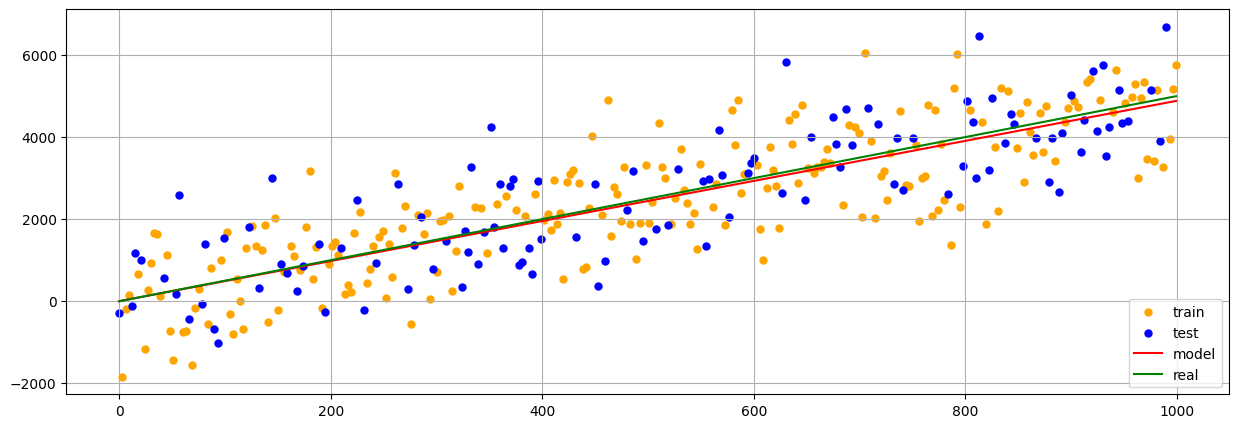

In [8]:
plt.figure(figsize=(15, 5))
plt.scatter(x_train, y_train, linewidths=0.01, c="orange")
plt.scatter(x_test, y_test, linewidths=0.01, c="blue")
plt.plot(x, model.weights[0] * x + model.bias, c="red")
plt.plot(x, a * x + b, c="green")
plt.legend(["train", "test", "model", "real"], loc ="lower right")
plt.grid(True)
plt.show()

### Используя векторизацию

In [9]:
%%time
model = LinearRegression(learning_rate=l_rate, epochs=epochs, report_interval=rep_int)
model.fit_vec(x_train, y_train, eval_set=(x_test, y_test))
predictions = model.predict(x_test)

print(f"Weights: {model.weights[0]}, bias: {model.bias[0]}")
print(f"R^2: {determination_coeff(y_test, predictions)}\n")

Weights: [4.88269289], bias: 0.010320217232855275
R^2: 0.6714798545851881

CPU times: total: 46.9 ms
Wall time: 70.1 ms


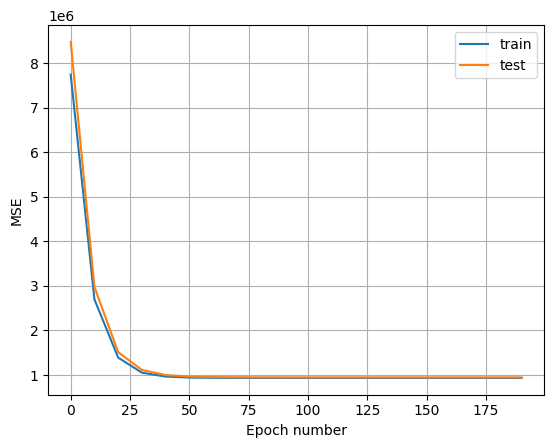

In [10]:
epoch_numbers = np.arange(0, len(model.losses_train)) * model.report_interval

plt.plot(epoch_numbers, model.losses_train, label="train")
plt.plot(epoch_numbers, model.losses_test, label="test")
plt.xlabel("Epoch number")
plt.ylabel("MSE")
plt.legend()
plt.grid(True)

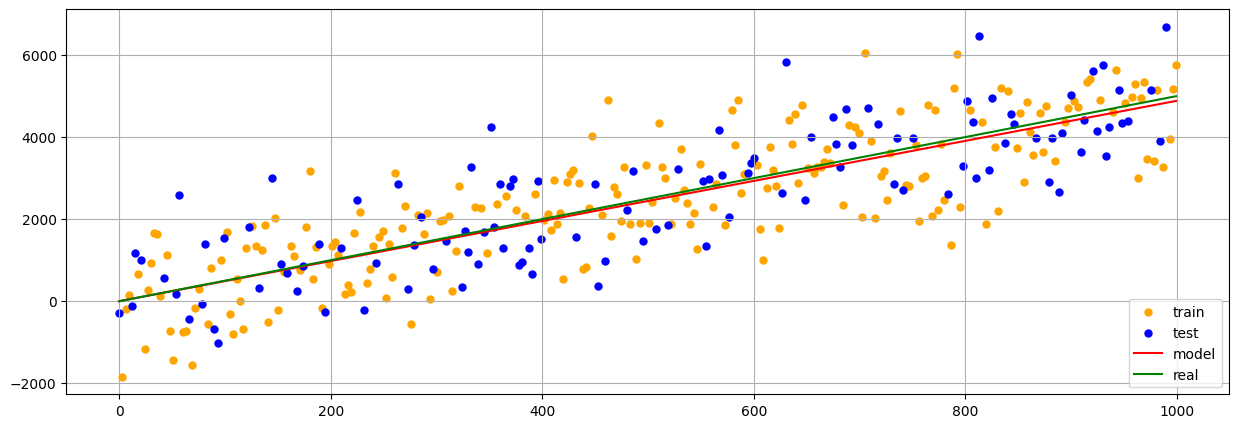

In [11]:
plt.figure(figsize=(15, 5))
plt.scatter(x_train, y_train, linewidths=0.01, c="orange")
plt.scatter(x_test, y_test, linewidths=0.01, c="blue")
plt.plot(x, model.weights[0] * x + model.bias[0], c="red")
plt.plot(x, a * x + b, c="green")
plt.legend(["train", "test", "model", "real"], loc ="lower right")
plt.grid(True)
plt.show()